In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import seaborn as sns
from random import randrange
from scipy.stats import linregress
# Study data files
path = "../Resources/backloggd_games.csv"

# Read the mouse data and the study results
game_df = pd.read_csv(path)

# Display the data table for preview
game_df.head()

,Unnamed: 0,Title,Release_Date,Developers,Summary,Platforms,Genres,Rating,Plays,Playing,Backlogs,Wishlist,Lists,Reviews
0,0,Elden Ring,25-Feb-22,"['FromSoftware', 'Bandai Namco Entertainment']","Elden Ring is a fantasy, action and open world...","['Windows PC', 'PlayStation 4', 'Xbox One', 'P...","['Adventure', 'RPG']",4.5,21K,4.1K,5.6K,5.5K,4.6K,3K
1,1,The Legend of Zelda: Breath of the Wild,3-Mar-17,"['Nintendo', 'Nintendo EPD Production Group No...",The Legend of Zelda: Breath of the Wild is the...,"['Wii U', 'Nintendo Switch']","['Adventure', 'Puzzle']",4.4,35K,3.1K,5.6K,3K,5.1K,3K
2,2,Hades,7-Dec-18,['Supergiant Games'],A rogue-lite hack and slash dungeon crawler in...,"['Windows PC', 'Mac', 'PlayStation 4', 'Xbox O...","['Adventure', 'Brawler', 'Indie', 'RPG']",4.3,25K,3.5K,7.3K,4K,3.2K,2.1K
3,3,Hollow Knight,24-Feb-17,['Team Cherry'],A 2D metroidvania with an emphasis on close co...,"['Windows PC', 'Mac', 'Linux', 'Nintendo Switch']","['Adventure', 'Indie', 'Platform']",4.4,25K,2.7K,9.6K,2.6K,3.4K,2.1K
4,4,Undertale,15-Sep-15,"['tobyfox', '8-4']","A small child falls into the Underground, wher...","['Windows PC', 'Mac', 'Linux', 'PlayStation 4'...","['Adventure', 'Indie', 'RPG', 'Turn Based Stra...",4.2,32K,728,5.7K,2.1K,3.9K,2.5K


In [2]:
game_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    60000 non-null  int64  
 1   Title         60000 non-null  object 
 2   Release_Date  60000 non-null  object 
 3   Developers    60000 non-null  object 
 4   Summary       55046 non-null  object 
 5   Platforms     60000 non-null  object 
 6   Genres        60000 non-null  object 
 7   Rating        25405 non-null  float64
 8   Plays         60000 non-null  object 
 9   Playing       60000 non-null  object 
 10  Backlogs      60000 non-null  object 
 11  Wishlist      60000 non-null  object 
 12  Lists         60000 non-null  object 
 13  Reviews       60000 non-null  object 
dtypes: float64(1), int64(1), object(12)
memory usage: 6.4+ MB


In [3]:
game_df.Developers.nunique()

18356

In [4]:
game_df.Developers.value_counts()

Developers
[]                                        18091
['Konami']                                  470
['Nintendo']                                325
['Capcom']                                  318
['Sega']                                    185
                                          ...  
['NanoPiko Games', 'Plug In Digital']         1
['DevCubeStudio', 'Fibrum Limited']           1
['TeamFatBears']                              1
['Blueside', 'Microsoft Game Studios']        1
['Travian Games', 'Shadow Masters']           1
Name: count, Length: 18356, dtype: int64

In [5]:
game_df.Title.value_counts()

Title
Date A Live Twin Edition: Rio Reincarnation            24
Tube                                                   21
Yakiniku Bugyou                                        20
The Store is Closed                                    20
Nonogram Survival                                      19
                                                       ..
Spider-Man: Homecoming - Virtual Reality Experience     1
Hammerfight                                             1
Team USA Basketball                                     1
Syvalion                                                1
Orbit - Playing with Gravity                            1
Name: count, Length: 40985, dtype: int64

In [6]:
game_df.Title.nunique()

40985

In [7]:
game_df['Developers']=game_df['Developers'].str.split(',').str[0]
game_df.head()

,Unnamed: 0,Title,Release_Date,Developers,Summary,Platforms,Genres,Rating,Plays,Playing,Backlogs,Wishlist,Lists,Reviews
0,0,Elden Ring,25-Feb-22,['FromSoftware',"Elden Ring is a fantasy, action and open world...","['Windows PC', 'PlayStation 4', 'Xbox One', 'P...","['Adventure', 'RPG']",4.5,21K,4.1K,5.6K,5.5K,4.6K,3K
1,1,The Legend of Zelda: Breath of the Wild,3-Mar-17,['Nintendo',The Legend of Zelda: Breath of the Wild is the...,"['Wii U', 'Nintendo Switch']","['Adventure', 'Puzzle']",4.4,35K,3.1K,5.6K,3K,5.1K,3K
2,2,Hades,7-Dec-18,['Supergiant Games'],A rogue-lite hack and slash dungeon crawler in...,"['Windows PC', 'Mac', 'PlayStation 4', 'Xbox O...","['Adventure', 'Brawler', 'Indie', 'RPG']",4.3,25K,3.5K,7.3K,4K,3.2K,2.1K
3,3,Hollow Knight,24-Feb-17,['Team Cherry'],A 2D metroidvania with an emphasis on close co...,"['Windows PC', 'Mac', 'Linux', 'Nintendo Switch']","['Adventure', 'Indie', 'Platform']",4.4,25K,2.7K,9.6K,2.6K,3.4K,2.1K
4,4,Undertale,15-Sep-15,['tobyfox',"A small child falls into the Underground, wher...","['Windows PC', 'Mac', 'Linux', 'PlayStation 4'...","['Adventure', 'Indie', 'RPG', 'Turn Based Stra...",4.2,32K,728,5.7K,2.1K,3.9K,2.5K


In [8]:
game_df["Developers"] = game_df["Developers"].astype(str)
game_df.head()

,Unnamed: 0,Title,Release_Date,Developers,Summary,Platforms,Genres,Rating,Plays,Playing,Backlogs,Wishlist,Lists,Reviews
0,0,Elden Ring,25-Feb-22,['FromSoftware',"Elden Ring is a fantasy, action and open world...","['Windows PC', 'PlayStation 4', 'Xbox One', 'P...","['Adventure', 'RPG']",4.5,21K,4.1K,5.6K,5.5K,4.6K,3K
1,1,The Legend of Zelda: Breath of the Wild,3-Mar-17,['Nintendo',The Legend of Zelda: Breath of the Wild is the...,"['Wii U', 'Nintendo Switch']","['Adventure', 'Puzzle']",4.4,35K,3.1K,5.6K,3K,5.1K,3K
2,2,Hades,7-Dec-18,['Supergiant Games'],A rogue-lite hack and slash dungeon crawler in...,"['Windows PC', 'Mac', 'PlayStation 4', 'Xbox O...","['Adventure', 'Brawler', 'Indie', 'RPG']",4.3,25K,3.5K,7.3K,4K,3.2K,2.1K
3,3,Hollow Knight,24-Feb-17,['Team Cherry'],A 2D metroidvania with an emphasis on close co...,"['Windows PC', 'Mac', 'Linux', 'Nintendo Switch']","['Adventure', 'Indie', 'Platform']",4.4,25K,2.7K,9.6K,2.6K,3.4K,2.1K
4,4,Undertale,15-Sep-15,['tobyfox',"A small child falls into the Underground, wher...","['Windows PC', 'Mac', 'Linux', 'PlayStation 4'...","['Adventure', 'Indie', 'RPG', 'Turn Based Stra...",4.2,32K,728,5.7K,2.1K,3.9K,2.5K


In [9]:
game_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    60000 non-null  int64  
 1   Title         60000 non-null  object 
 2   Release_Date  60000 non-null  object 
 3   Developers    60000 non-null  object 
 4   Summary       55046 non-null  object 
 5   Platforms     60000 non-null  object 
 6   Genres        60000 non-null  object 
 7   Rating        25405 non-null  float64
 8   Plays         60000 non-null  object 
 9   Playing       60000 non-null  object 
 10  Backlogs      60000 non-null  object 
 11  Wishlist      60000 non-null  object 
 12  Lists         60000 non-null  object 
 13  Reviews       60000 non-null  object 
dtypes: float64(1), int64(1), object(12)
memory usage: 6.4+ MB


In [10]:
game_df["Developers"] = game_df["Developers"].apply(lambda x: str(x).lstrip("['")) #TA Mike came up with this code
game_df["Developers"] = game_df["Developers"].apply(lambda x: str(x).rstrip("']"))
game_df.head()

,Unnamed: 0,Title,Release_Date,Developers,Summary,Platforms,Genres,Rating,Plays,Playing,Backlogs,Wishlist,Lists,Reviews
0,0,Elden Ring,25-Feb-22,FromSoftware,"Elden Ring is a fantasy, action and open world...","['Windows PC', 'PlayStation 4', 'Xbox One', 'P...","['Adventure', 'RPG']",4.5,21K,4.1K,5.6K,5.5K,4.6K,3K
1,1,The Legend of Zelda: Breath of the Wild,3-Mar-17,Nintendo,The Legend of Zelda: Breath of the Wild is the...,"['Wii U', 'Nintendo Switch']","['Adventure', 'Puzzle']",4.4,35K,3.1K,5.6K,3K,5.1K,3K
2,2,Hades,7-Dec-18,Supergiant Games,A rogue-lite hack and slash dungeon crawler in...,"['Windows PC', 'Mac', 'PlayStation 4', 'Xbox O...","['Adventure', 'Brawler', 'Indie', 'RPG']",4.3,25K,3.5K,7.3K,4K,3.2K,2.1K
3,3,Hollow Knight,24-Feb-17,Team Cherry,A 2D metroidvania with an emphasis on close co...,"['Windows PC', 'Mac', 'Linux', 'Nintendo Switch']","['Adventure', 'Indie', 'Platform']",4.4,25K,2.7K,9.6K,2.6K,3.4K,2.1K
4,4,Undertale,15-Sep-15,tobyfox,"A small child falls into the Underground, wher...","['Windows PC', 'Mac', 'Linux', 'PlayStation 4'...","['Adventure', 'Indie', 'RPG', 'Turn Based Stra...",4.2,32K,728,5.7K,2.1K,3.9K,2.5K


In [11]:
game_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    60000 non-null  int64  
 1   Title         60000 non-null  object 
 2   Release_Date  60000 non-null  object 
 3   Developers    60000 non-null  object 
 4   Summary       55046 non-null  object 
 5   Platforms     60000 non-null  object 
 6   Genres        60000 non-null  object 
 7   Rating        25405 non-null  float64
 8   Plays         60000 non-null  object 
 9   Playing       60000 non-null  object 
 10  Backlogs      60000 non-null  object 
 11  Wishlist      60000 non-null  object 
 12  Lists         60000 non-null  object 
 13  Reviews       60000 non-null  object 
dtypes: float64(1), int64(1), object(12)
memory usage: 6.4+ MB


In [12]:
# Use a for loop to change to columns (Plays, Playing, Backlogs, Wishlist, Lists, and Reviews)
# Use an replace statement to any change any value with 'K' to a float, multiply that by 1,000, and then change the entire column to integers

cols = ('Plays', 'Playing', 'Backlogs', 'Wishlist', 'Lists', 'Reviews')

for col in cols:
    # Apply a lambda function to replace 'K' and multiply by 1000 if 'K' is present
    game_df[col] = game_df[col].apply(lambda x: float(str(x).replace('K', '')) * 1000 if 'K' in str(x) else int(x))

game_df.head()

,Unnamed: 0,Title,Release_Date,Developers,Summary,Platforms,Genres,Rating,Plays,Playing,Backlogs,Wishlist,Lists,Reviews
0,0,Elden Ring,25-Feb-22,FromSoftware,"Elden Ring is a fantasy, action and open world...","['Windows PC', 'PlayStation 4', 'Xbox One', 'P...","['Adventure', 'RPG']",4.5,21000.0,4100.0,5600.0,5500.0,4600.0,3000.0
1,1,The Legend of Zelda: Breath of the Wild,3-Mar-17,Nintendo,The Legend of Zelda: Breath of the Wild is the...,"['Wii U', 'Nintendo Switch']","['Adventure', 'Puzzle']",4.4,35000.0,3100.0,5600.0,3000.0,5100.0,3000.0
2,2,Hades,7-Dec-18,Supergiant Games,A rogue-lite hack and slash dungeon crawler in...,"['Windows PC', 'Mac', 'PlayStation 4', 'Xbox O...","['Adventure', 'Brawler', 'Indie', 'RPG']",4.3,25000.0,3500.0,7300.0,4000.0,3200.0,2100.0
3,3,Hollow Knight,24-Feb-17,Team Cherry,A 2D metroidvania with an emphasis on close co...,"['Windows PC', 'Mac', 'Linux', 'Nintendo Switch']","['Adventure', 'Indie', 'Platform']",4.4,25000.0,2700.0,9600.0,2600.0,3400.0,2100.0
4,4,Undertale,15-Sep-15,tobyfox,"A small child falls into the Underground, wher...","['Windows PC', 'Mac', 'Linux', 'PlayStation 4'...","['Adventure', 'Indie', 'RPG', 'Turn Based Stra...",4.2,32000.0,728.0,5700.0,2100.0,3900.0,2500.0


In [13]:
# Change Release_Date to datetime, had to adjust for TBD values so changed them to NaT (Not a Time) function

game_df['Release_Date'] = game_df['Release_Date'].str.replace('TBD', 'NaT')
game_df['Release_Date'] = pd.to_datetime(game_df['Release_Date'])

C:\Users\nb51\AppData\Local\Temp\ipykernel_9480\275331274.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  game_df['Release_Date'] = pd.to_datetime(game_df['Release_Date'])


In [14]:
game_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Unnamed: 0    60000 non-null  int64         
 1   Title         60000 non-null  object        
 2   Release_Date  51981 non-null  datetime64[ns]
 3   Developers    60000 non-null  object        
 4   Summary       55046 non-null  object        
 5   Platforms     60000 non-null  object        
 6   Genres        60000 non-null  object        
 7   Rating        25405 non-null  float64       
 8   Plays         60000 non-null  float64       
 9   Playing       60000 non-null  float64       
 10  Backlogs      60000 non-null  float64       
 11  Wishlist      60000 non-null  float64       
 12  Lists         60000 non-null  float64       
 13  Reviews       60000 non-null  float64       
dtypes: datetime64[ns](1), float64(7), int64(1), object(5)
memory usage: 6.4+ MB


In [15]:
game_df['Platforms'] = game_df['Platforms'].str.split(',')
game_df['Genres'] = game_df['Genres'].str.split(',')

In [16]:
# After converting those columns into a list, I could now continue with creating a code that can count the Platforms and Genres, then put them in new columns.
# I thought that maybe len(x) could work, it failed, then tried .apply len(x), which also failed.
# There was no specific function to accomplish what I needed, which reminded me of lambda, which I had previously looked up because the TA had given the group a lambda function before.
# After repeated trial and error I finally came up with the code below.
# ".apply" applies all the things in the () to the Platforms column. 
# "lambda x:" is used because "lambda", x, and colon, must be used in that order to start the lambda function.
# "len(x)" is used to count the x or elements within the cell.
platform_counts = game_df['Platforms'].apply(lambda x: len(x))
genre_counts = game_df['Genres'].apply(lambda x: len(x))

# Adding new columns for platform and genre counts through the use of brackets..
game_df['Platform_Count'] = platform_counts
game_df['Genre_Count'] = genre_counts

game_df.head()

,Unnamed: 0,Title,Release_Date,Developers,Summary,Platforms,Genres,Rating,Plays,Playing,Backlogs,Wishlist,Lists,Reviews,Platform_Count,Genre_Count
0,0,Elden Ring,2022-02-25,FromSoftware,"Elden Ring is a fantasy, action and open world...","[['Windows PC', 'PlayStation 4', 'Xbox One',...","[['Adventure', 'RPG']]",4.5,21000.0,4100.0,5600.0,5500.0,4600.0,3000.0,5,2
1,1,The Legend of Zelda: Breath of the Wild,2017-03-03,Nintendo,The Legend of Zelda: Breath of the Wild is the...,"[['Wii U', 'Nintendo Switch']]","[['Adventure', 'Puzzle']]",4.4,35000.0,3100.0,5600.0,3000.0,5100.0,3000.0,2,2
2,2,Hades,2018-12-07,Supergiant Games,A rogue-lite hack and slash dungeon crawler in...,"[['Windows PC', 'Mac', 'PlayStation 4', 'Xb...","[['Adventure', 'Brawler', 'Indie', 'RPG']]",4.3,25000.0,3500.0,7300.0,4000.0,3200.0,2100.0,7,4
3,3,Hollow Knight,2017-02-24,Team Cherry,A 2D metroidvania with an emphasis on close co...,"[['Windows PC', 'Mac', 'Linux', 'Nintendo S...","[['Adventure', 'Indie', 'Platform']]",4.4,25000.0,2700.0,9600.0,2600.0,3400.0,2100.0,4,3
4,4,Undertale,2015-09-15,tobyfox,"A small child falls into the Underground, wher...","[['Windows PC', 'Mac', 'Linux', 'PlayStatio...","[['Adventure', 'Indie', 'RPG', 'Turn Based ...",4.2,32000.0,728.0,5700.0,2100.0,3900.0,2500.0,7,4


In [17]:
# Now that the list was done, I need to convert back to a string so I could use str.replace (as was originally planned but would change) to get rid of the extra characters.
# I copied the code used for turning the developers column into a string and then altered it for Platforms and Genres.
game_df['Platforms'] = game_df['Platforms'].astype(str)
game_df['Genres'] = game_df['Genres'].astype(str)
game_df.head()

,Unnamed: 0,Title,Release_Date,Developers,Summary,Platforms,Genres,Rating,Plays,Playing,Backlogs,Wishlist,Lists,Reviews,Platform_Count,Genre_Count
0,0,Elden Ring,2022-02-25,FromSoftware,"Elden Ring is a fantasy, action and open world...","[""['Windows PC'"", "" 'PlayStation 4'"", "" 'Xbox ...","[""['Adventure'"", "" 'RPG']""]",4.5,21000.0,4100.0,5600.0,5500.0,4600.0,3000.0,5,2
1,1,The Legend of Zelda: Breath of the Wild,2017-03-03,Nintendo,The Legend of Zelda: Breath of the Wild is the...,"[""['Wii U'"", "" 'Nintendo Switch']""]","[""['Adventure'"", "" 'Puzzle']""]",4.4,35000.0,3100.0,5600.0,3000.0,5100.0,3000.0,2,2
2,2,Hades,2018-12-07,Supergiant Games,A rogue-lite hack and slash dungeon crawler in...,"[""['Windows PC'"", "" 'Mac'"", "" 'PlayStation 4'""...","[""['Adventure'"", "" 'Brawler'"", "" 'Indie'"", "" '...",4.3,25000.0,3500.0,7300.0,4000.0,3200.0,2100.0,7,4
3,3,Hollow Knight,2017-02-24,Team Cherry,A 2D metroidvania with an emphasis on close co...,"[""['Windows PC'"", "" 'Mac'"", "" 'Linux'"", "" 'Nin...","[""['Adventure'"", "" 'Indie'"", "" 'Platform']""]",4.4,25000.0,2700.0,9600.0,2600.0,3400.0,2100.0,4,3
4,4,Undertale,2015-09-15,tobyfox,"A small child falls into the Underground, wher...","[""['Windows PC'"", "" 'Mac'"", "" 'Linux'"", "" 'Pla...","[""['Adventure'"", "" 'Indie'"", "" 'RPG'"", "" 'Turn...",4.2,32000.0,728.0,5700.0,2100.0,3900.0,2500.0,7,4


In [18]:
# Originally was 8 lines of code to remove the unwanted characters but after playing around a bit, I got it lowered to two.
game_df['Platforms'] = game_df['Platforms'].str.replace("[","").str.replace("]","").str.replace("'","").str.replace('"','')
game_df['Genres'] = game_df['Genres'].str.replace("[","").str.replace("]","").str.replace("'","").str.replace('"','')
game_df.head()

,Unnamed: 0,Title,Release_Date,Developers,Summary,Platforms,Genres,Rating,Plays,Playing,Backlogs,Wishlist,Lists,Reviews,Platform_Count,Genre_Count
0,0,Elden Ring,2022-02-25,FromSoftware,"Elden Ring is a fantasy, action and open world...","Windows PC, PlayStation 4, Xbox One, PlaySt...","Adventure, RPG",4.5,21000.0,4100.0,5600.0,5500.0,4600.0,3000.0,5,2
1,1,The Legend of Zelda: Breath of the Wild,2017-03-03,Nintendo,The Legend of Zelda: Breath of the Wild is the...,"Wii U, Nintendo Switch","Adventure, Puzzle",4.4,35000.0,3100.0,5600.0,3000.0,5100.0,3000.0,2,2
2,2,Hades,2018-12-07,Supergiant Games,A rogue-lite hack and slash dungeon crawler in...,"Windows PC, Mac, PlayStation 4, Xbox One, ...","Adventure, Brawler, Indie, RPG",4.3,25000.0,3500.0,7300.0,4000.0,3200.0,2100.0,7,4
3,3,Hollow Knight,2017-02-24,Team Cherry,A 2D metroidvania with an emphasis on close co...,"Windows PC, Mac, Linux, Nintendo Switch","Adventure, Indie, Platform",4.4,25000.0,2700.0,9600.0,2600.0,3400.0,2100.0,4,3
4,4,Undertale,2015-09-15,tobyfox,"A small child falls into the Underground, wher...","Windows PC, Mac, Linux, PlayStation 4, Xbo...","Adventure, Indie, RPG, Turn Based Strategy",4.2,32000.0,728.0,5700.0,2100.0,3900.0,2500.0,7,4


In [19]:
game_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Unnamed: 0      60000 non-null  int64         
 1   Title           60000 non-null  object        
 2   Release_Date    51981 non-null  datetime64[ns]
 3   Developers      60000 non-null  object        
 4   Summary         55046 non-null  object        
 5   Platforms       60000 non-null  object        
 6   Genres          60000 non-null  object        
 7   Rating          25405 non-null  float64       
 8   Plays           60000 non-null  float64       
 9   Playing         60000 non-null  float64       
 10  Backlogs        60000 non-null  float64       
 11  Wishlist        60000 non-null  float64       
 12  Lists           60000 non-null  float64       
 13  Reviews         60000 non-null  float64       
 14  Platform_Count  60000 non-null  int64         
 15  Ge

In [20]:
game_df['Developers'] = game_df['Developers'].replace({"Nintendo EAD": "Nintendo"}).replace({"Ubisoft Montreal":"Ubisoft Entertainment"}).replace({"Sony Computer Entertainment": "Sony Interactive Entertainment"})

In [21]:
# Add next cell to data cleaning area

In [22]:
# Color Codes for seaborn palette
colors = ['#007F5F', '#2B9348', '#55A630', '#80B918', '#AACC00', '#BFD200', '#D4D700', '#DDDF00', '#EEEF20', '#FFFF3F']

# Set custom palette name in seaborn charts
customPalette = sns.set_palette(sns.color_palette(colors))

# Copy Code for seaborn charts
# palette=customPalette

In [23]:
# NICK START

In [24]:
# Developer Summary Leaderboard

over_200_reviews =game_df[game_df['Reviews'] >= 200]

dev_avg_rating = over_200_reviews.groupby('Developers')['Rating'].mean()
dev_avg_playing = over_200_reviews.groupby('Developers')['Playing'].mean()
dev_sum_title = over_200_reviews.groupby('Developers')['Title'].count()
dev_sum_plays = over_200_reviews.groupby('Developers')['Plays'].sum()

dev_summary_data = {
    "Number of Titles by Dev": dev_sum_title,
    "Average Rating by Dev": dev_avg_rating,
    "Average Number Playing by Dev": dev_avg_playing,
    "Total Number of Plays by Dev": dev_sum_plays    
}

dev_summary_data = pd.DataFrame(dev_summary_data)
dev_summary_data.sort_values(by="Total Number of Plays by Dev", ascending=False).head(20)

,Number of Titles by Dev,Average Rating by Dev,Average Number Playing by Dev,Total Number of Plays by Dev
Developers,,,,
Nintendo,106,3.788679,301.216981,1011400.0
Capcom,37,3.837838,268.270270,260600.0
Ubisoft Entertainment,20,3.330000,200.200000,195400.0
Sony Interactive Entertainment,17,3.941176,302.647059,168400.0
Electronic Arts,14,3.650000,290.714286,156500.0
Square Enix,24,3.737500,378.500000,144700.0
Konami,16,3.950000,220.000000,130500.0
Naughty Dog,8,4.000000,192.125000,101200.0
Bandai Namco Entertainment,10,3.900000,413.600000,95400.0


In [25]:
# First section = What are the top 20 developers by Plays and Titles and how do those numbers compare?

# Bar chart of Plays summed by Developer
# Bar chart of Titles summed by Developer
# Double bar of the two brought together

In [26]:
db = dev_summary_data.sort_values(by='Total Number of Plays by Dev', ascending=False)

top_20_by_plays =db[db['Total Number of Plays by Dev'] >= 54100]
top_20_by_plays.reset_index('Developers')

,Developers,Number of Titles by Dev,Average Rating by Dev,Average Number Playing by Dev,Total Number of Plays by Dev
0,Nintendo,106,3.788679,301.216981,1011400.0
1,Capcom,37,3.837838,268.270270,260600.0
2,Ubisoft Entertainment,20,3.330000,200.200000,195400.0
3,Sony Interactive Entertainment,17,3.941176,302.647059,168400.0
4,Electronic Arts,14,3.650000,290.714286,156500.0
5,Square Enix,24,3.737500,378.500000,144700.0
6,Konami,16,3.950000,220.000000,130500.0
7,Naughty Dog,8,4.000000,192.125000,101200.0
8,Bandai Namco Entertainment,10,3.900000,413.600000,95400.0
9,Sega,19,3.352632,244.842105,92600.0


In [27]:
# Mini Leaderboard for presentation Question # 1 part A
mask1a = {
    "Number of Plays by Dev": dev_sum_plays   
}

mask1a = pd.DataFrame(mask1a)
mask1a.sort_values(by="Number of Plays by Dev", ascending=False).head()

,Number of Plays by Dev
Developers,
Nintendo,1011400.0
Capcom,260600.0
Ubisoft Entertainment,195400.0
Sony Interactive Entertainment,168400.0
Electronic Arts,156500.0


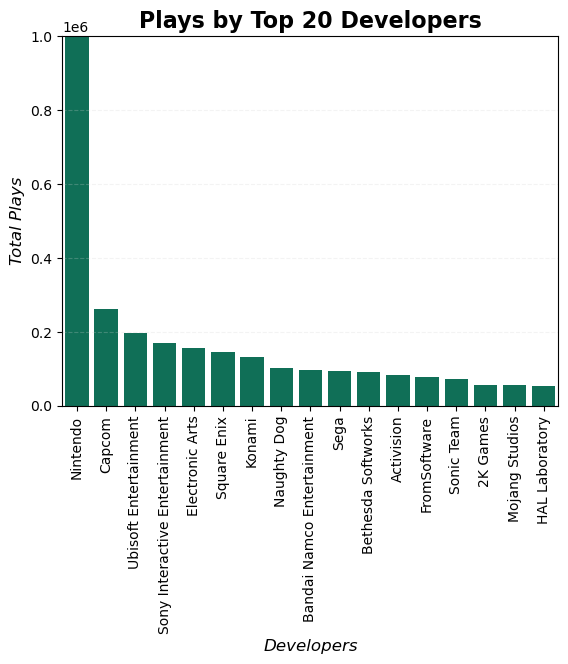

In [28]:
# Basic Bars of Developers by Sum of Plays
# https://seaborn.pydata.org/examples/part_whole_bars.html


# Dataset
top_20_by_plays =db[db['Total Number of Plays by Dev'] >= 54100]

sns.barplot(x=top_20_by_plays.index, y='Total Number of Plays by Dev', data=top_20_by_plays, color='#007f5f')

# customizations
plt.xlabel("Developers", fontstyle="italic", fontsize=12)
plt.ylabel("Total Plays", fontstyle="italic", fontsize=12)
plt.title("Plays by Top 20 Developers", fontsize=16, fontweight="bold")
plt.ylim(0, 1000000)
plt.xticks(rotation=90)


plt.grid(color="lightgrey", axis="y", linestyle="--", alpha=0.25)

# show
plt.show()

In [29]:
db = dev_summary_data.sort_values(by='Number of Titles by Dev', ascending=False)

top_20_by_plays =db[db['Total Number of Plays by Dev'] >= 54100]
top_20_by_plays.reset_index('Developers')

,Developers,Number of Titles by Dev,Average Rating by Dev,Average Number Playing by Dev,Total Number of Plays by Dev
0,Nintendo,106,3.788679,301.216981,1011400.0
1,Capcom,37,3.837838,268.270270,260600.0
2,Square Enix,24,3.737500,378.500000,144700.0
3,Ubisoft Entertainment,20,3.330000,200.200000,195400.0
4,Sega,19,3.352632,244.842105,92600.0
5,Sony Interactive Entertainment,17,3.941176,302.647059,168400.0
6,Konami,16,3.950000,220.000000,130500.0
7,Electronic Arts,14,3.650000,290.714286,156500.0
8,Bandai Namco Entertainment,10,3.900000,413.600000,95400.0
9,Sonic Team,9,3.333333,81.888889,72100.0


In [30]:
# Mini Leaderboard for presentation Question # 1 part B
mask1b = {
    "Number of Titles by Dev": dev_sum_title   
}

mask1b = pd.DataFrame(mask1b)
mask1b.sort_values(by="Number of Titles by Dev", ascending=False).head()

,Number of Titles by Dev
Developers,
Nintendo,106
Capcom,37
Square Enix,24
Ubisoft Entertainment,20
Sega,19


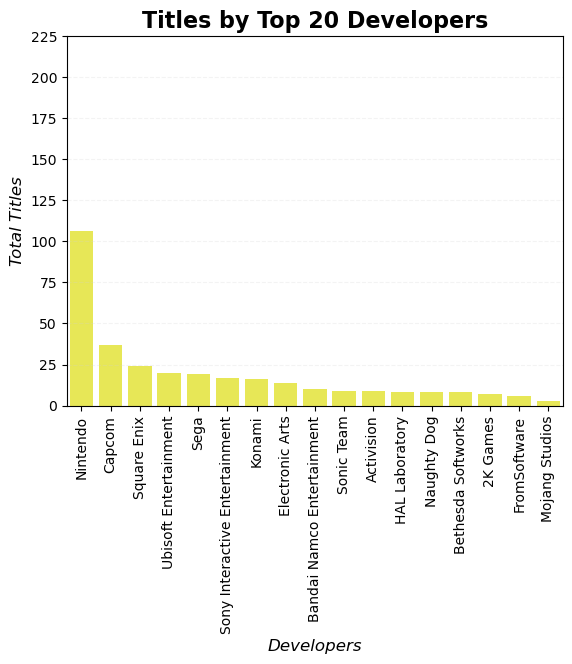

In [31]:
# Basic Bars of Developers by Sum of Titles
# https://seaborn.pydata.org/examples/part_whole_bars.html


# Dataset
top_20_by_plays =db[db['Total Number of Plays by Dev'] >= 54100]

sns.barplot(x=top_20_by_plays.index, y='Number of Titles by Dev', data=top_20_by_plays, color='#FFFF3F')
sns.set_palette(sns.color_palette(colors))

# customizations
plt.xlabel("Developers", fontstyle="italic", fontsize=12)
plt.ylabel("Total Titles", fontstyle="italic", fontsize=12)
plt.title("Titles by Top 20 Developers", fontsize=16, fontweight="bold")
plt.ylim(0, 225)
plt.xticks(rotation=90)


plt.grid(color="lightgrey", axis="y", linestyle="--", alpha=0.25)

# show
plt.show()

In [32]:
db = dev_summary_data.sort_values(by='Total Number of Plays by Dev', ascending=False)

top_20_by_plays =db[db['Total Number of Plays by Dev'] >= 54100]
top_20_by_plays.reset_index('Developers')

,Developers,Number of Titles by Dev,Average Rating by Dev,Average Number Playing by Dev,Total Number of Plays by Dev
0,Nintendo,106,3.788679,301.216981,1011400.0
1,Capcom,37,3.837838,268.270270,260600.0
2,Ubisoft Entertainment,20,3.330000,200.200000,195400.0
3,Sony Interactive Entertainment,17,3.941176,302.647059,168400.0
4,Electronic Arts,14,3.650000,290.714286,156500.0
5,Square Enix,24,3.737500,378.500000,144700.0
6,Konami,16,3.950000,220.000000,130500.0
7,Naughty Dog,8,4.000000,192.125000,101200.0
8,Bandai Namco Entertainment,10,3.900000,413.600000,95400.0
9,Sega,19,3.352632,244.842105,92600.0


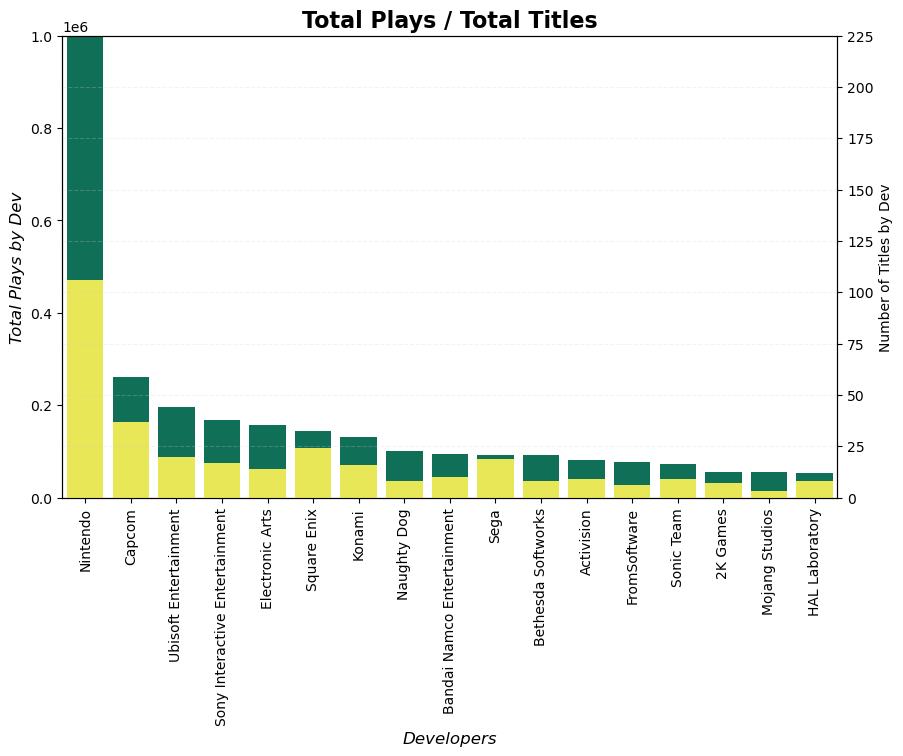

In [33]:
# Basic Bars
# https://seaborn.pydata.org/examples/part_whole_bars.html


# Dataset
top_20_by_plays =db[db['Total Number of Plays by Dev'] >= 54100]

fig, ax1 = plt.subplots(figsize=(10, 6))

sns.barplot(x=top_20_by_plays.index, y='Total Number of Plays by Dev', data=top_20_by_plays, color='#007f5f', ax=ax1)

# customizations
plt.xlabel("Developers", fontstyle="italic", fontsize=12)
plt.ylabel("Total Plays by Dev", fontstyle="italic", fontsize=12)
plt.title("Total Plays / Total Titles", fontsize=16, fontweight="bold")
plt.ylim(0, 1000000)
plt.xticks(rotation=90)

ax2=ax1.twinx()

sns.barplot(x=top_20_by_plays.index, y='Number of Titles by Dev', data=top_20_by_plays, color='#FFFF3F')
plt.ylim(0, 225)

plt.grid(color="lightgrey", axis="y", linestyle="--", alpha=0.25)

    
# show
plt.show()

In [34]:
# Second section = What are the top 20 developers by average rating and how are they distributed?

# Violin chart of Average Rating by Count grouped by Developer

In [35]:
db = dev_summary_data.sort_values(by='Average Rating by Dev', ascending=False)

top_20_by_plays =db[db['Total Number of Plays by Dev'] >= 54100]
top_20_by_plays.reset_index('Developers')

,Developers,Number of Titles by Dev,Average Rating by Dev,Average Number Playing by Dev,Total Number of Plays by Dev
0,FromSoftware,6,4.250000,1133.500000,76100.0
1,Naughty Dog,8,4.000000,192.125000,101200.0
2,Konami,16,3.950000,220.000000,130500.0
3,Sony Interactive Entertainment,17,3.941176,302.647059,168400.0
4,Bandai Namco Entertainment,10,3.900000,413.600000,95400.0
5,Bethesda Softworks,8,3.900000,514.125000,92200.0
6,HAL Laboratory,8,3.887500,98.500000,54100.0
7,Capcom,37,3.837838,268.270270,260600.0
8,Mojang Studios,3,3.800000,944.000000,54400.0
9,Nintendo,106,3.788679,301.216981,1011400.0


In [36]:
# Mini Leaderboard for presentation Question # 2
mask2a = {
    "Average Rating by Dev": dev_avg_rating,
    "Number of Titles by Dev": dev_sum_title
}

mask2a = pd.DataFrame(mask2a)
mask2a.sort_values(by="Average Rating by Dev", ascending=False).head(10)

,Average Rating by Dev,Number of Titles by Dev
Developers,,
ZA/UM,4.60,2
Mobius Digital,4.55,2
Konami Computer Entertainment Japan,4.55,2
Team Cherry,4.45,2
Tour De Pizza,4.40,1
07th Expansion,4.40,1
Buena Vista Games,4.40,2
Edmund McMillen,4.40,1
Atlus USA,4.40,1


C:\Users\nb51\anaconda3\envs\dev\lib\site-packages\seaborn\categorical.py:486: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if np.isscalar(data[0]):


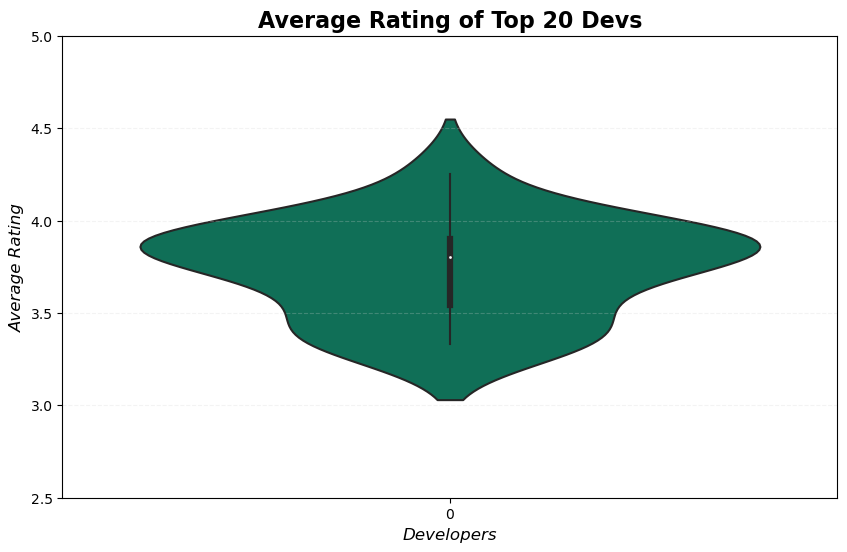

In [37]:
# Basic Violinplot
# https://seaborn.pydata.org/examples/wide_form_violinplot.html


# create the plot
plt.figure(figsize=(10,6))
sns.violinplot(data=top_20_by_plays['Average Rating by Dev'])

# customizations
plt.xlabel("Developers", fontstyle="italic", fontsize=12)
plt.ylabel("Average Rating", fontstyle="italic", fontsize=12)
plt.title("Average Rating of Top 20 Devs", fontsize=16, fontweight="bold")
plt.ylim(2.5, 5)

plt.grid(color="lightgrey", axis="y", linestyle="--", alpha=0.25)

# show
plt.show()

In [38]:
top_20_by_plays.describe()

,Number of Titles by Dev,Average Rating by Dev,Average Number Playing by Dev,Total Number of Plays by Dev
count,17.000000,17.000000,17.000000,1.700000e+01
mean,18.882353,3.744534,352.584654,1.672529e+05
std,23.939722,0.263609,281.294101,2.246382e+05
min,3.000000,3.330000,81.888889,5.410000e+04
25%,8.000000,3.542857,200.200000,7.610000e+04
50%,10.000000,3.800000,268.270270,9.540000e+04
75%,19.000000,3.900000,378.500000,1.565000e+05
max,106.000000,4.250000,1133.500000,1.011400e+06


In [39]:
top_20_by_plays['Average Rating by Dev'].value_counts

<bound method IndexOpsMixin.value_counts of Developers
FromSoftware                      4.250000
Naughty Dog                       4.000000
Konami                            3.950000
Sony Interactive Entertainment    3.941176
Bandai Namco Entertainment        3.900000
Bethesda Softworks                3.900000
HAL Laboratory                    3.887500
Capcom                            3.837838
Mojang Studios                    3.800000
Nintendo                          3.788679
Square Enix                       3.737500
Electronic Arts                   3.650000
2K Games                          3.542857
Activision                        3.455556
Sega                              3.352632
Sonic Team                        3.333333
Ubisoft Entertainment             3.330000
Name: Average Rating by Dev, dtype: float64>

In [40]:
# Third section = How do the top 20 developers by rating compared based on playing?

# Scatter plot of avg rating / avg playing

In [41]:
db = dev_summary_data.sort_values(by='Average Rating by Dev', ascending=False)

top_20_by_plays =db[db['Total Number of Plays by Dev'] >= 54100]
top_20_by_plays.reset_index('Developers')

,Developers,Number of Titles by Dev,Average Rating by Dev,Average Number Playing by Dev,Total Number of Plays by Dev
0,FromSoftware,6,4.250000,1133.500000,76100.0
1,Naughty Dog,8,4.000000,192.125000,101200.0
2,Konami,16,3.950000,220.000000,130500.0
3,Sony Interactive Entertainment,17,3.941176,302.647059,168400.0
4,Bandai Namco Entertainment,10,3.900000,413.600000,95400.0
5,Bethesda Softworks,8,3.900000,514.125000,92200.0
6,HAL Laboratory,8,3.887500,98.500000,54100.0
7,Capcom,37,3.837838,268.270270,260600.0
8,Mojang Studios,3,3.800000,944.000000,54400.0
9,Nintendo,106,3.788679,301.216981,1011400.0


In [42]:
# Mini Leaderboard for presentation Question # 3
mask3a = top_20_by_plays =db[db['Total Number of Plays by Dev'] >= 54100]
mask3a = {
    "Avg Rating by Dev": dev_avg_rating,
    "Avg Number Playing by Dev": dev_avg_playing,
    "Sum of Plays by Dev": dev_sum_plays, 
    
}

mask3a = pd.DataFrame(mask3a)
mask3a.sort_values(by="Sum of Plays by Dev", ascending=False).head()

,Avg Rating by Dev,Avg Number Playing by Dev,Sum of Plays by Dev
Developers,,,
Nintendo,3.788679,301.216981,1011400.0
Capcom,3.837838,268.270270,260600.0
Ubisoft Entertainment,3.330000,200.200000,195400.0
Sony Interactive Entertainment,3.941176,302.647059,168400.0
Electronic Arts,3.650000,290.714286,156500.0


<Figure size 1000x600 with 0 Axes>

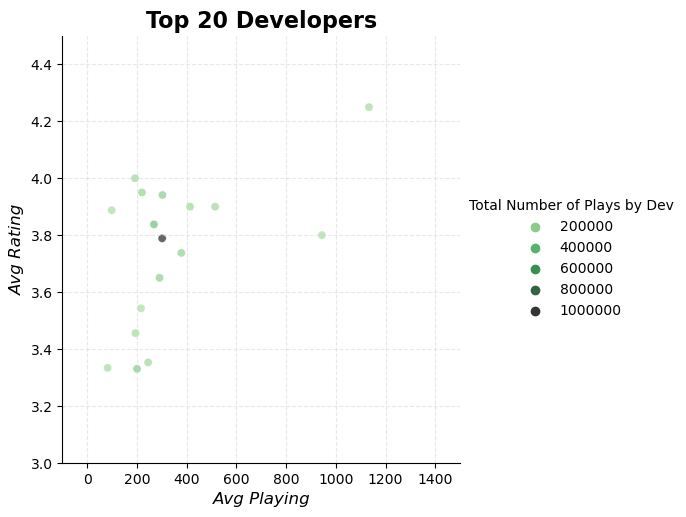

In [43]:
# Basic Scatter
# https://seaborn.pydata.org/examples/scatter_bubbles.html

custompalette = sns.set_palette(sns.color_palette(colors))
x = top_20_by_plays['Average Number Playing by Dev']
y = top_20_by_plays['Average Rating by Dev']

# create the plot
plt.figure(figsize=(10,6))
sns.relplot(x=x, y=y, alpha=.75, hue=top_20_by_plays['Total Number of Plays by Dev'], palette='Greens_d')


# customizations
plt.xlabel("Avg Playing", fontstyle="italic", fontsize=12)
plt.ylabel("Avg Rating", fontstyle="italic", fontsize=12)
plt.title("Top 20 Developers", fontsize=16, fontweight="bold")
plt.xlim(-100, 1500)
plt.ylim(3,4.5)

plt.grid(color="lightgrey", axis="x", linestyle="--", alpha=0.5)
plt.grid(color="lightgrey", axis="y", linestyle="--", alpha=0.5)

# show

In [44]:
top_20_by_plays.describe()

,Number of Titles by Dev,Average Rating by Dev,Average Number Playing by Dev,Total Number of Plays by Dev
count,17.000000,17.000000,17.000000,1.700000e+01
mean,18.882353,3.744534,352.584654,1.672529e+05
std,23.939722,0.263609,281.294101,2.246382e+05
min,3.000000,3.330000,81.888889,5.410000e+04
25%,8.000000,3.542857,200.200000,7.610000e+04
50%,10.000000,3.800000,268.270270,9.540000e+04
75%,19.000000,3.900000,378.500000,1.565000e+05
max,106.000000,4.250000,1133.500000,1.011400e+06


In [45]:
# NICK END